In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
from scipy import constants as const
from matplotlib import font_manager  # noqa: E402

sys.path.append("../../")

%matplotlib inline

In [3]:
from matplotlib import rcParams  # noqa: E402

plt.style.use('seaborn-v0_8-dark-palette')

# resource configuration
rcParams["figure.dpi"] = 300

# fount information
rcParams["font.family"] = "Equinor"

rcParams['font.size'] = 10
rcParams['axes.titlesize'] = 12
rcParams['axes.grid']  = True
rcParams['figure.dpi'] = 300
rcParams['grid.linewidth'] = 0.1
rcParams['lines.linewidth'] = 0.5


# font location
font_path = r"../Equinor_regular"
font_files = font_manager.findSystemFonts(fontpaths=font_path)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

In [4]:
a12_data = pd.read_excel(
	r'Poretryksplott A-12 nytt RKB, 80 bar depletion in res, after cement log and updated barrier depths.xlsx',
	header=2,      # Row 3 is header (0-based index)
	skiprows= [3,4,5],  # Skip rows 4, 5, 6
	
)


a12_data = a12_data.drop(a12_data.columns[0], axis=1)

In [5]:
# where WellClass and Ga[ codes are located
sys.path.append('../../')

In [6]:
# WellClass
# from well_class_v2 import csv_parser, Well
from src.WellClass.libs.utils import (
    csv_parser,
    yaml_parser
)

from src.WellClass.libs.well_class import Well
from src.WellClass.libs.well_pressure import Pressure



# plots
from src.WellClass.libs.plotting import (
    plot_pressure,
    plot_pt,
    plot_sketch,
    plot_onepager
)

In [7]:
a12_data

,Div info,"Cement behind 10"" casing",New cement log,DEPTH [mTVD],depth [mMD],FG OVERBURDEN,PP,SHMIN OVERBURD.,flow potential,Unnamed: 10,...,Unnamed: 80,Kyrre (11),Unnamed: 82,Unnamed: 83,Kyrre (12),Unnamed: 85,Unnamed: 86,Kyrre (13),Unnamed: 88,Unnamed: 89
0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,362.737992,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,362.764482,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,362.790972,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,362.817462,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,362.843952,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3891,NaN,NaN,NaN,3891.2,4982.41,NaN,1.753,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3892,NaN,NaN,NaN,3892.2,4983.57,NaN,1.752,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3893,NaN,NaN,NaN,3893.2,4984.72,NaN,1.752,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3894,NaN,NaN,NaN,3894.2,4985.88,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


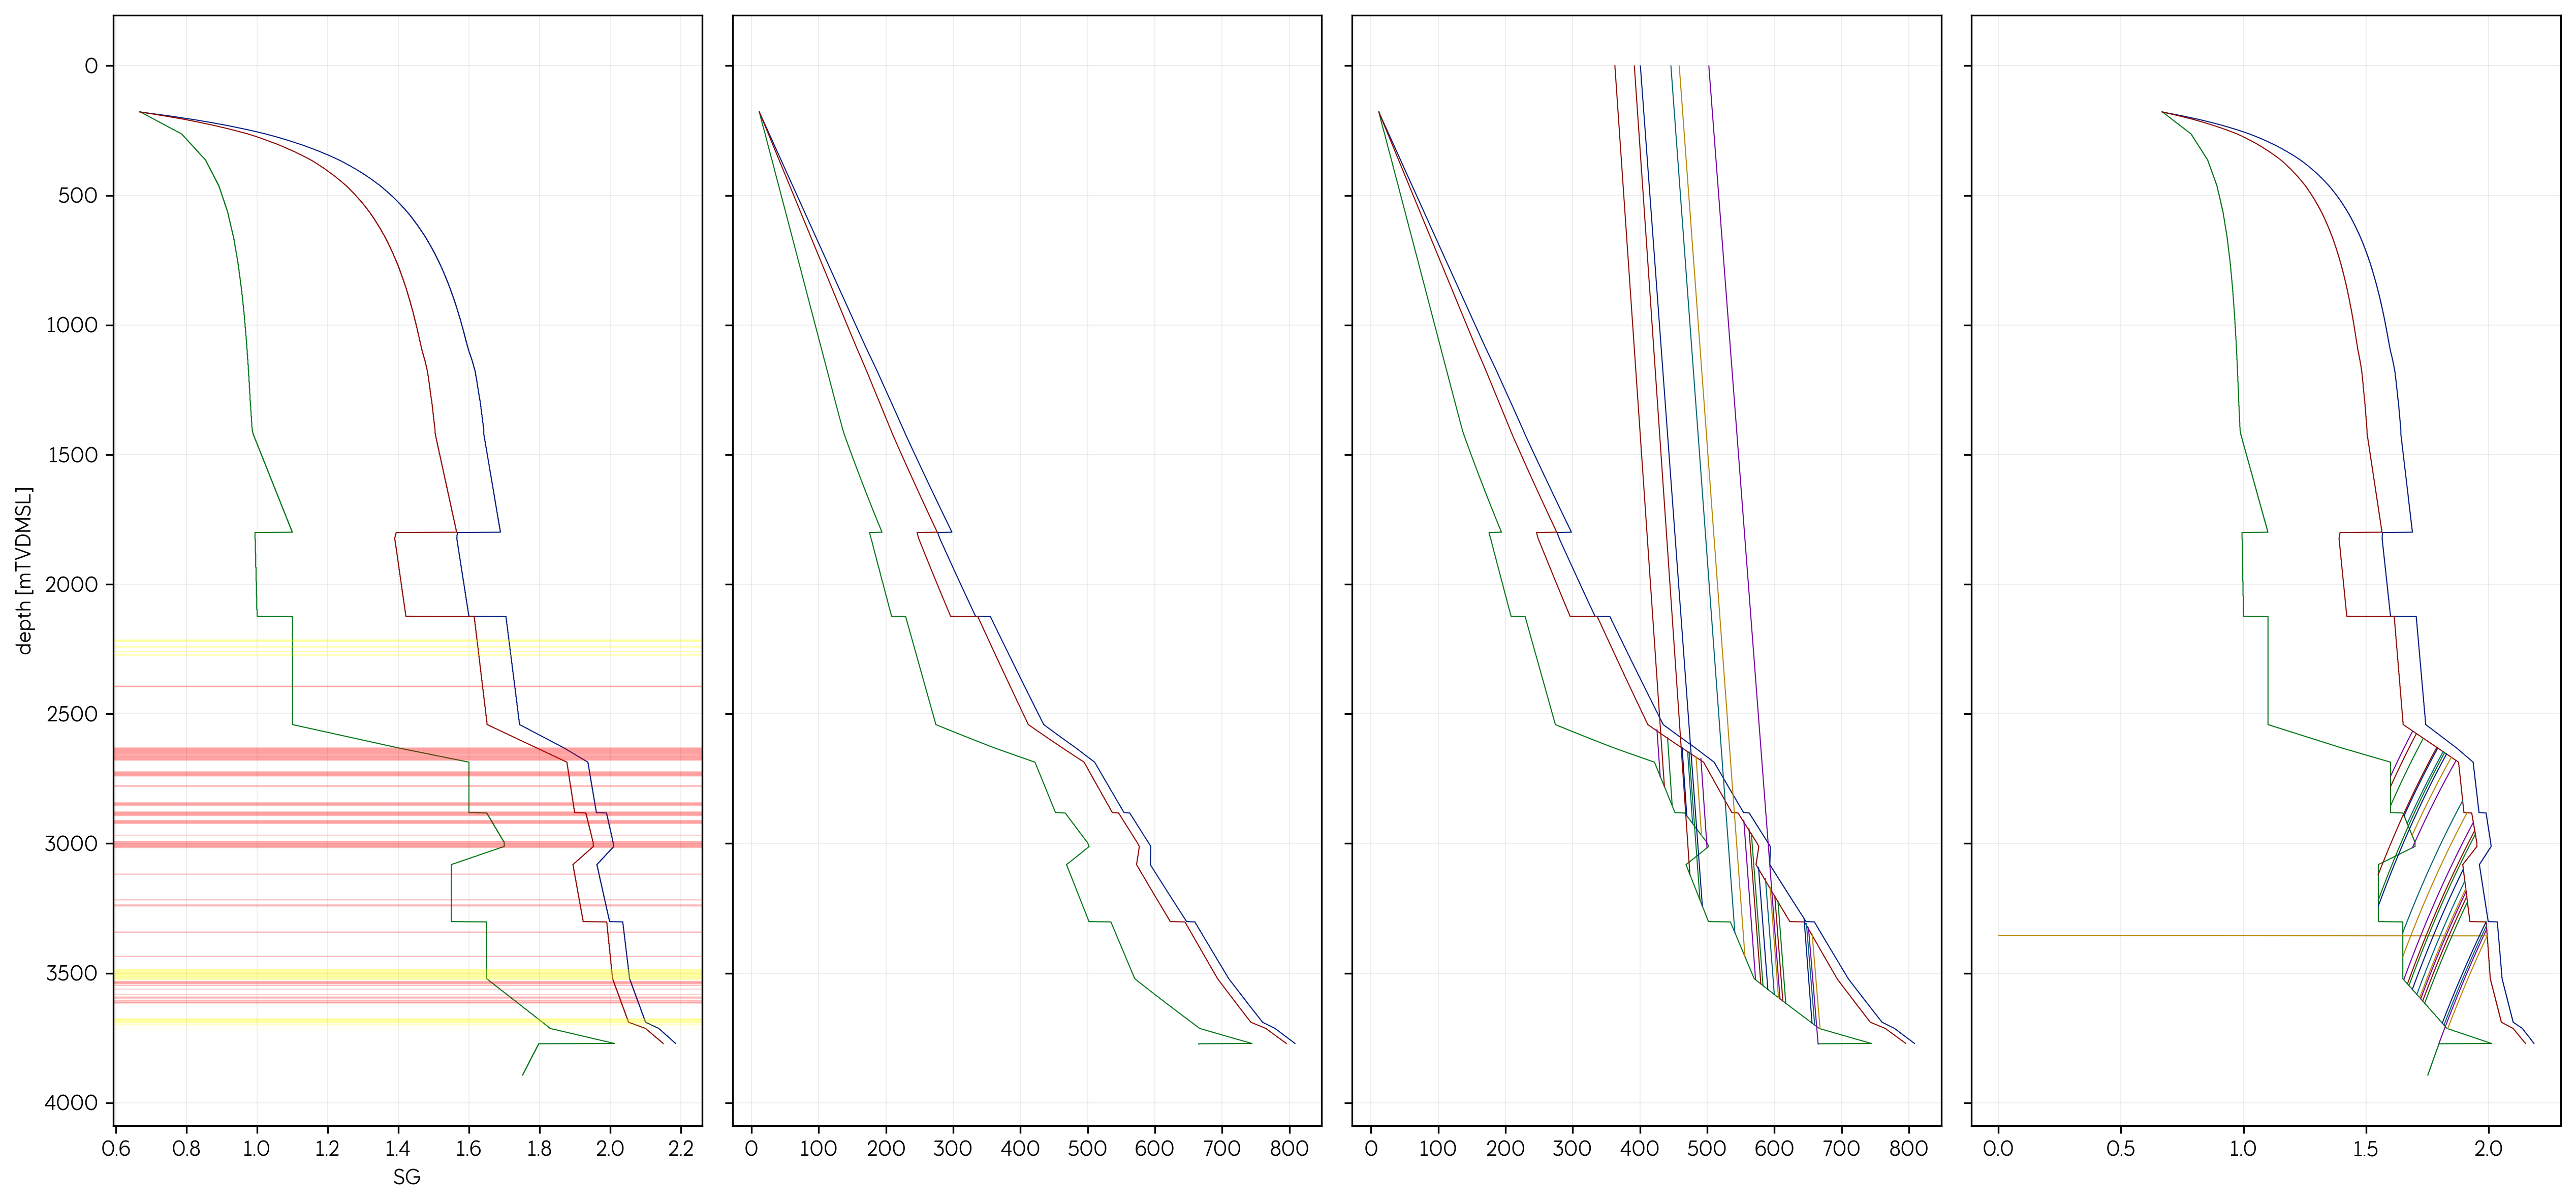

In [8]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, sharey=True, figsize=(17,8))


cols_in_ax0 = [5,6,7]

for col in cols_in_ax0:
    ax0.plot(a12_data.iloc[:,col], a12_data.iloc[:,3], label=a12_data.columns[col])
    ax3.plot(a12_data.iloc[:,col], a12_data.iloc[:,3], label=a12_data.columns[col])

cols_in_ax1 = [10, 11, 12]
for col in cols_in_ax1:
	ax1.plot(a12_data.iloc[:,col], a12_data.iloc[:,3], label=a12_data.columns[col])
	ax2.plot(a12_data.iloc[:,col], a12_data.iloc[:,3], label=a12_data.columns[col])


for flow_potential in a12_data['flow potential'].unique():

	if 'limited' in str(flow_potential).lower():
		color = 'yellow'

		for depth_value in a12_data[a12_data['flow potential'] == flow_potential]['DEPTH [mTVD]']:
			ax0.axhline(y=depth_value, color=color, alpha=0.1)
		
	elif 'flow' in str(flow_potential).lower():
		color = 'red'

		for depth_value in a12_data[a12_data['flow potential'] == flow_potential]['DEPTH [mTVD]']:
			ax0.axhline(y=depth_value, color=color, alpha=0.1)



cols_in_ax2 = a12_data.columns[14::3]
for col in cols_in_ax2:
	ax2.plot(pd.to_numeric(a12_data[col], errors='coerce'), a12_data.iloc[:,3], label=col)


cols_in_ax3 = a12_data.columns[16::3]
for col in cols_in_ax3:
	ax3.plot(pd.to_numeric(a12_data[col], errors='coerce'), a12_data.iloc[:,3], label=col)

# ax1.plot(pd.to_numeric(a12_data.iloc[:,14], errors='coerce'), a12_data.iloc[:,3], label=a12_data.columns[14], color='blue')
# ax1.plot(pd.to_numeric(a12_data.iloc[:,14], errors='coerce'), a12_data.iloc[:,3], label=a12_data.columns[14], color='blue')

ax0.invert_yaxis()
ax0.set_ylabel('depth [mTVDMSL]')
ax0.set_xlabel('SG')
# ax0.legend()
# ax1.legend()
fig.tight_layout()

In [9]:
geological_tops= {}

for column_idx in range(len(a12_data.columns))[14::3]:
	column = a12_data.columns[column_idx]
	depth = a12_data[~pd.to_numeric(a12_data[column], errors='coerce').isnull()]['DEPTH [mTVD]'].max()
	pressure=a12_data[a12_data["DEPTH [mTVD]"]==depth][column].iloc[0]
	fluid_gradient = a12_data.iloc[:,column_idx+1].dropna().iloc[-1]
	msad = a12_data.loc[(a12_data[a12_data.columns[12]] - a12_data[column]).abs().idxmin(), 'DEPTH [mTVD]']
	geological_tops[column] = (float(depth), float(pressure), float(fluid_gradient), float(msad))

print(geological_tops)



{'Res': (3772.2, 665.0, 0.032, 3331.2), 'Heather': (3714.2, 667.87741566, 0.032, 3355.2), 'Cromer Knoll': (3700.2, 659.91512916, 0.03139, 3317.2), 'Svarte': (3692.2, 655.9529290199999, 0.02943, 3302.2), 'Tryggvason(1)': (3616.2, 616.90889358, 0.02943, 3225.2), 'Tryggvason(2)': (3607.2, 612.54259992, 0.02943, 3204.2), 'Tryggvason(3)': (3599.2, 608.35945896, 0.02943, 3185.2), 'Tryggvason(4)': (3594.2, 606.10396338, 0.02943, 3174.2), 'Tryggvason(5)': (3582.2, 599.86339074, 0.02943, 3144.2), 'Tryggvason(6)': (3562.2, 590.2241239800001, 0.02943, 3098.2), 'Tryggvason(7)': (3548.2, 583.0313535, 0.02943, 2964.2), 'Tryggvason(8)': (3541.2, 579.79678068, 0.02943, 2950.2), 'Kyrre (1)': (3525.2, 571.9897864799999, 0.02845, 2918.2), 'Kyrre (2)': (3436.2, 556.200513, 0.02845, 2881.2), 'Kyrre (3)': (3343.2, 541.147068, 0.02845, 2834.2), 'Kyrre (4)': (3241.2, 492.840666, 0.02845, 2654.2), 'Kyrre (5)': (3218.2, 489.34340100000003, 0.02845, 2649.2), 'Kyrre (6)': (3119.2, 474.2899560000001, 0.02649, 2629

In [10]:



geological_tops



geological_tops_df = pd.DataFrame.from_dict(geological_tops, orient='index', columns=['depth', 'pressure', 'gradient', 'msad'])
geological_tops_df['msad_msl'] = geological_tops_df['msad'] - 57
geological_tops_df['depth_msl'] = geological_tops_df['depth'] - 57

geological_tops_df.index.name = 'top'

geological_tops_df['sg'] = (geological_tops_df['gradient'] * const.bar/const.g) / 1e3
geological_tops_df

,depth,pressure,gradient,msad,msad_msl,depth_msl,sg
top,,,,,,,
Res,3772.2,665.000000,0.03200,3331.2,3274.2,3715.2,0.326309
Heather,3714.2,667.877416,0.03200,3355.2,3298.2,3657.2,0.326309
Cromer Knoll,3700.2,659.915129,0.03139,3317.2,3260.2,3643.2,0.320089
Svarte,3692.2,655.952929,0.02943,3302.2,3245.2,3635.2,0.300102
Tryggvason(1),3616.2,616.908894,0.02943,3225.2,3168.2,3559.2,0.300102
Tryggvason(2),3607.2,612.542600,0.02943,3204.2,3147.2,3550.2,0.300102
Tryggvason(3),3599.2,608.359459,0.02943,3185.2,3128.2,3542.2,0.300102
Tryggvason(4),3594.2,606.103963,0.02943,3174.2,3117.2,3537.2,0.300102
Tryggvason(5),3582.2,599.863391,0.02943,3144.2,3087.2,3525.2,0.300102


In [11]:
import os
# Retrieve PVT data that is available


directory_path = '../../src/WellClass/libs/pvt/pvt_constants'

# Iterate over all files in the directory
for filename in os.listdir(directory_path):
    # print(filename)
    file_path = os.path.join(directory_path, filename)
    if os.path.isdir(file_path):
        print(f'{filename}')

methane
water
mixture2
mixture1
pure_co2


In [12]:

shmin_data = a12_data[~a12_data['SHMIN'].isnull()][['DEPTH [mTVD]','SHMIN']].values
shmin_data[:,0] = shmin_data[:,0] - 57
my_pressure = Pressure(
    # wellbore seafloor depth mTVD MSL.
    sf_depth_msl=115, #wellbore.water_depth,
    # wellbore total depth in mTVD RKB
    well_td_rkb=3800, #total_depth_rkb,
    # wellbore rkb in mTVD RKB
    well_rkb=57,
    # seafloor temperature in degC
    sf_temp=4, #DEFAULT_SEAFLOOR_TEMPERATURE,
    # geothermal gradient in degC/km
    geo_tgrad=40, #DEFAULT_GEOTHERMAL_GRADIENT,
    # path to the pvt constants folder
    pvt_path=directory_path,
    fluid_type='pure_co2',
	# z_fluid_contact=3000,
    ip_shmin_data=shmin_data,
)

/workspaces/WINC_OnePager/notebooks/martin_linge/../../src/WellClass/libs/well_pressure/WellConditions.py:173: UserWarning: No Shmin data between seafloor depth (115) and minimum provided depth (121.19999999999999). Extrapolating using hydrostatic pressure at seafloor.
  warnings.warn(


In [13]:
for top, row in geological_tops_df.iterrows():
	depth, pressure, sg = row['depth_msl'], row['pressure'], row['sg']

	my_pressure.add_scenario(scenario_name=top, from_resrvr=True, z_resrv=depth, p_resrv=pressure, specific_gravity=sg)

Computing pressure profile for scenario: Res
Computing pressure profile for scenario: Heather
Computing pressure profile for scenario: Cromer Knoll
Computing pressure profile for scenario: Svarte
Computing pressure profile for scenario: Tryggvason(1)
Computing pressure profile for scenario: Tryggvason(2)
Computing pressure profile for scenario: Tryggvason(3)
Computing pressure profile for scenario: Tryggvason(4)


Computing pressure profile for scenario: Tryggvason(5)
Computing pressure profile for scenario: Tryggvason(6)
Computing pressure profile for scenario: Tryggvason(7)
Computing pressure profile for scenario: Tryggvason(8)
Computing pressure profile for scenario: Kyrre (1)
Computing pressure profile for scenario: Kyrre (2)
Computing pressure profile for scenario: Kyrre (3)
Computing pressure profile for scenario: Kyrre (4)
Computing pressure profile for scenario: Kyrre (5)
Computing pressure profile for scenario: Kyrre (6)
Computing pressure profile for scenario: Kyrre (7)
Computing pressure profile for scenario: Kyrre (8)
Computing pressure profile for scenario: Kyrre (9)
Computing pressure profile for scenario: Kyrre (10)
Computing pressure profile for scenario: Kyrre (11)
Computing pressure profile for scenario: Kyrre (12)
Computing pressure profile for scenario: Kyrre (13)


In [14]:
my_pressure.scenario_manager.get_scenarios_summary()

,name,from_resrvr,z_MSAD,p_MSAD,z_MSAD_brine,p_MSAD_brine,z_resrv,p_resrv,z_fluid_contact,p_fluid_contact,p_delta,fluid_type,fluid_composition,specific_gravity
0,Res,True,3273.715870,650.872508,3222.887685,618.095162,3715.2,665.000000,3715.2,665.000000,298.534848,None,None,0.326309
1,Heather,True,3298.652575,656.403898,3244.318907,628.516041,3657.2,667.877416,3657.2,667.877416,306.887208,None,None,0.326309
2,Cromer Knoll,True,3260.119934,647.890246,3235.810350,621.062900,3643.2,659.915129,3643.2,659.915129,300.247919,None,None,0.320089
3,Svarte,True,3245.930283,644.496721,3213.223061,615.689510,3635.2,655.952929,3635.2,655.952929,297.041970,None,None,0.300102
4,Tryggvason(1),True,3167.810797,605.390309,2827.767904,546.638634,3559.2,616.908894,3559.2,616.908894,265.191455,None,None,0.300102
5,Tryggvason(2),True,3147.160894,600.681159,2824.826009,542.839695,3550.2,612.542600,3550.2,612.542600,261.678113,None,None,0.300102
6,Tryggvason(3),True,3128.112935,596.172877,2824.358615,539.369510,3542.2,608.359459,3542.2,608.359459,258.253343,None,None,0.300102
7,Tryggvason(4),True,3116.721095,593.729269,2824.115511,537.564580,3537.2,606.103963,3537.2,606.103963,256.471921,None,None,0.300102
8,Tryggvason(5),True,3087.201747,586.973102,2788.789831,529.030907,3525.2,599.863391,3525.2,599.863391,251.369412,None,None,0.300102
9,Tryggvason(6),True,3041.244083,576.569901,2722.966088,514.885303,3505.2,590.224124,3505.2,590.224124,243.627818,None,None,0.300102


In [15]:
import numpy as np
a = geological_tops_df['msad_msl'].values - my_pressure.scenario_manager.get_scenarios_summary()['z_MSAD'].values
diff_msad = np.abs(a)

In [16]:
my_pressure.scenario_manager.get_scenarios_summary()['z_MSAD'].values

array([3273.71586976, 3298.6525747 , 3260.11993417, 3245.93028297,
       3167.81079663, 3147.16089385, 3128.11293532, 3116.72109521,
       3087.20174672, 3041.24408265, 2907.01883354, 2893.26293969,
       2861.0385629 , 2824.50000909, 2777.63018442, 2597.65954071,
       2592.64030634, 2572.03450472, 2622.7522089 , 2610.30108101,
       2588.80590954, 2574.80004575, 2536.77720863, 2518.92650559,
       2509.20755015])

In [17]:
diff_msad

array([0.48413024, 0.4525747 , 0.08006583, 0.73028297, 0.38920337,
       0.03910615, 0.08706468, 0.47890479, 0.00174672, 0.04408265,
       0.18116646, 0.06293969, 0.1614371 , 0.30000909, 0.43018442,
       0.45954071, 0.44030634, 0.16549528, 0.4477911 , 0.10108101,
       0.39409046, 0.39995425, 0.42279137, 0.27349441, 0.00755015])

In [18]:
diff_msad[np.argsort(diff_msad)[-3:]]

ranking_indices = np.argsort(diff_msad)

In [19]:
diff_msad[ranking_indices[-1]]

np.float64(0.7302829683490017)

In [20]:
ranking_indices[-1]

np.int64(3)

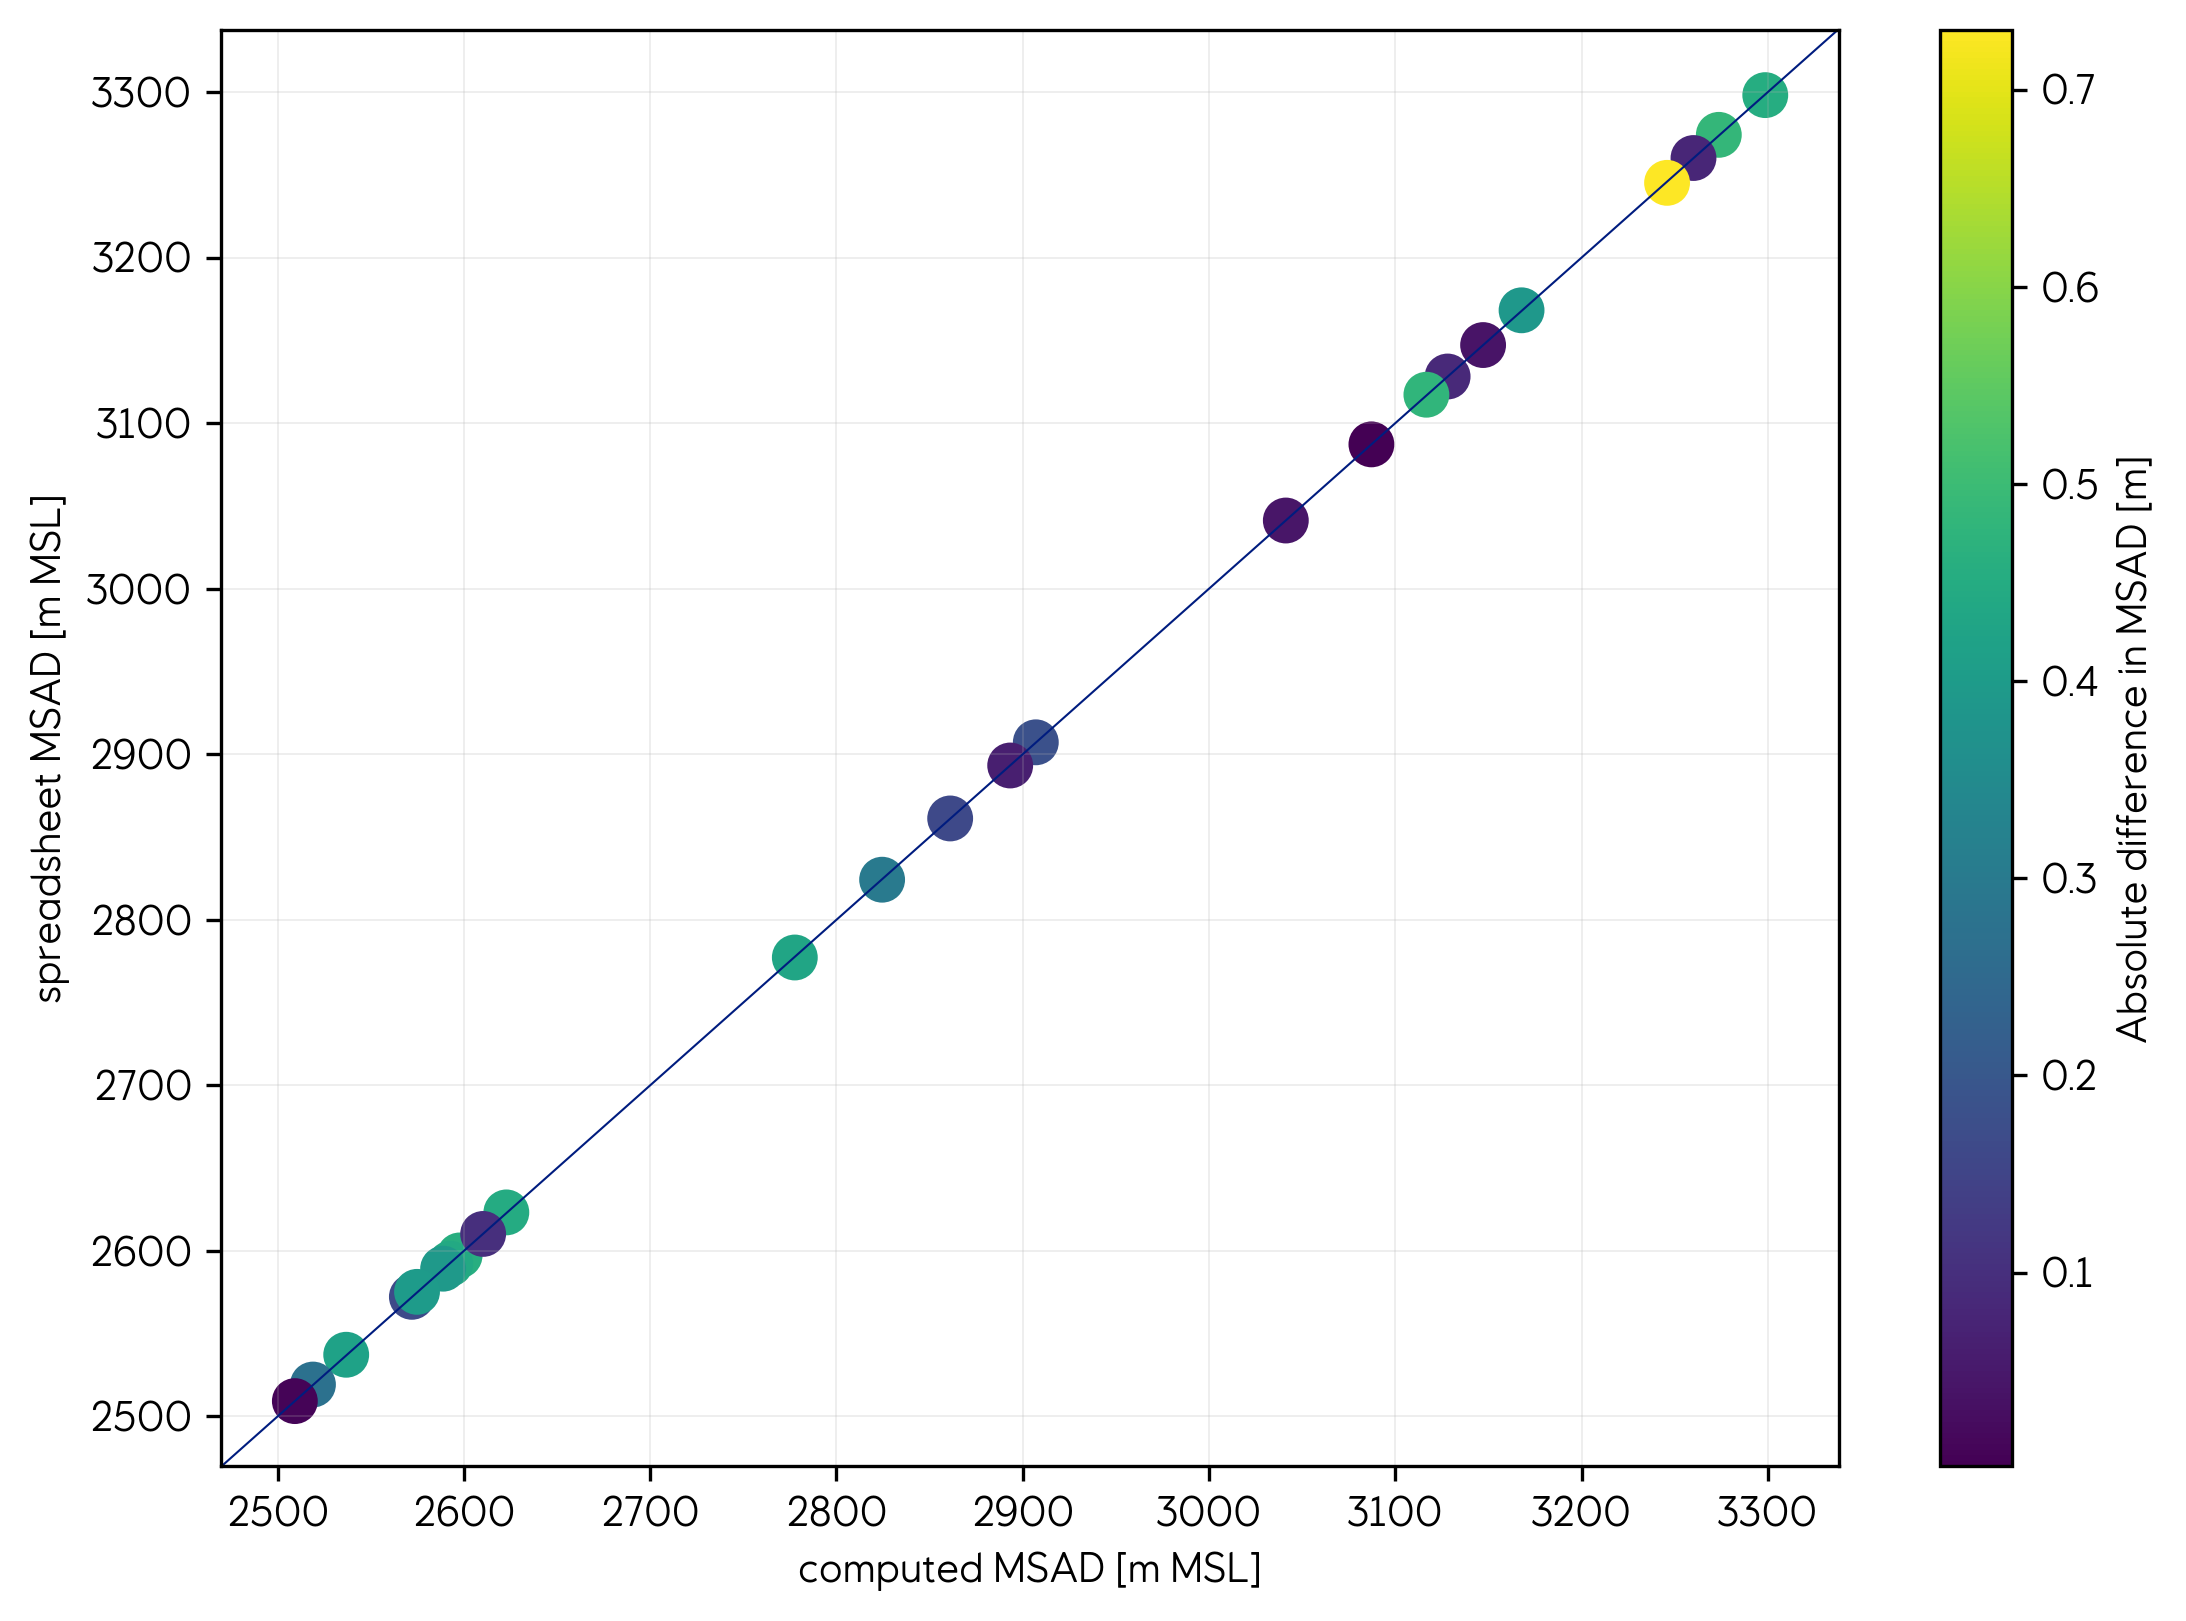

In [21]:
width_cm = 19.5
height_cm = 13.98


    

fig, ax = plt.subplots(ncols=1, figsize=(width_cm/2.54,height_cm/2.54))

scatter = ax.scatter(my_pressure.scenario_manager.get_scenarios_summary()['z_MSAD'], geological_tops_df['msad_msl'],
           c=diff_msad, cmap='viridis', s=100)

fig.colorbar(scatter, ax=ax, label='Absolute difference in MSAD [m]')
ax.axline([geological_tops_df['msad_msl'].mean()]*2, slope=1, lw=0.5)
# ax.set_aspect('equal', adjustable='box')

ax.set_xlabel('computed MSAD [m MSL]')
ax.set_ylabel('spreadsheet MSAD [m MSL]')

fig.tight_layout()


In [22]:
geological_tops_df

,depth,pressure,gradient,msad,msad_msl,depth_msl,sg
top,,,,,,,
Res,3772.2,665.000000,0.03200,3331.2,3274.2,3715.2,0.326309
Heather,3714.2,667.877416,0.03200,3355.2,3298.2,3657.2,0.326309
Cromer Knoll,3700.2,659.915129,0.03139,3317.2,3260.2,3643.2,0.320089
Svarte,3692.2,655.952929,0.02943,3302.2,3245.2,3635.2,0.300102
Tryggvason(1),3616.2,616.908894,0.02943,3225.2,3168.2,3559.2,0.300102
Tryggvason(2),3607.2,612.542600,0.02943,3204.2,3147.2,3550.2,0.300102
Tryggvason(3),3599.2,608.359459,0.02943,3185.2,3128.2,3542.2,0.300102
Tryggvason(4),3594.2,606.103963,0.02943,3174.2,3117.2,3537.2,0.300102
Tryggvason(5),3582.2,599.863391,0.02943,3144.2,3087.2,3525.2,0.300102


In [23]:
a12_data.iloc[:,12]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
3891   NaN
3892   NaN
3893   NaN
3894   NaN
3895   NaN
Name: SHMIN, Length: 3896, dtype: float64

In [24]:
ranking_indices[-3:]

array([7, 0, 3])

In [25]:
my_pressure.scenario_manager.get_scenarios_summary()

,name,from_resrvr,z_MSAD,p_MSAD,z_MSAD_brine,p_MSAD_brine,z_resrv,p_resrv,z_fluid_contact,p_fluid_contact,p_delta,fluid_type,fluid_composition,specific_gravity
0,Res,True,3273.715870,650.872508,3222.887685,618.095162,3715.2,665.000000,3715.2,665.000000,298.534848,None,None,0.326309
1,Heather,True,3298.652575,656.403898,3244.318907,628.516041,3657.2,667.877416,3657.2,667.877416,306.887208,None,None,0.326309
2,Cromer Knoll,True,3260.119934,647.890246,3235.810350,621.062900,3643.2,659.915129,3643.2,659.915129,300.247919,None,None,0.320089
3,Svarte,True,3245.930283,644.496721,3213.223061,615.689510,3635.2,655.952929,3635.2,655.952929,297.041970,None,None,0.300102
4,Tryggvason(1),True,3167.810797,605.390309,2827.767904,546.638634,3559.2,616.908894,3559.2,616.908894,265.191455,None,None,0.300102
5,Tryggvason(2),True,3147.160894,600.681159,2824.826009,542.839695,3550.2,612.542600,3550.2,612.542600,261.678113,None,None,0.300102
6,Tryggvason(3),True,3128.112935,596.172877,2824.358615,539.369510,3542.2,608.359459,3542.2,608.359459,258.253343,None,None,0.300102
7,Tryggvason(4),True,3116.721095,593.729269,2824.115511,537.564580,3537.2,606.103963,3537.2,606.103963,256.471921,None,None,0.300102
8,Tryggvason(5),True,3087.201747,586.973102,2788.789831,529.030907,3525.2,599.863391,3525.2,599.863391,251.369412,None,None,0.300102
9,Tryggvason(6),True,3041.244083,576.569901,2722.966088,514.885303,3505.2,590.224124,3505.2,590.224124,243.627818,None,None,0.300102


In [26]:
my_pressure.init_curves

,depth,temperature,hydrostatic_pressure,min_horizontal_stress
0,0.0,4.00,1.013250,1.013250
1,1.0,4.00,1.113844,1.113844
2,2.0,4.00,1.214438,1.214438
3,3.0,4.00,1.315033,1.315033
4,4.0,4.00,1.415628,1.415628
...,...,...,...,...
4238,4238.0,168.92,415.358594,1099.610823
4239,4239.0,168.96,415.451299,1100.191594
4240,4240.0,169.00,415.544002,1100.772366
4241,4241.0,169.04,415.636701,1101.353137


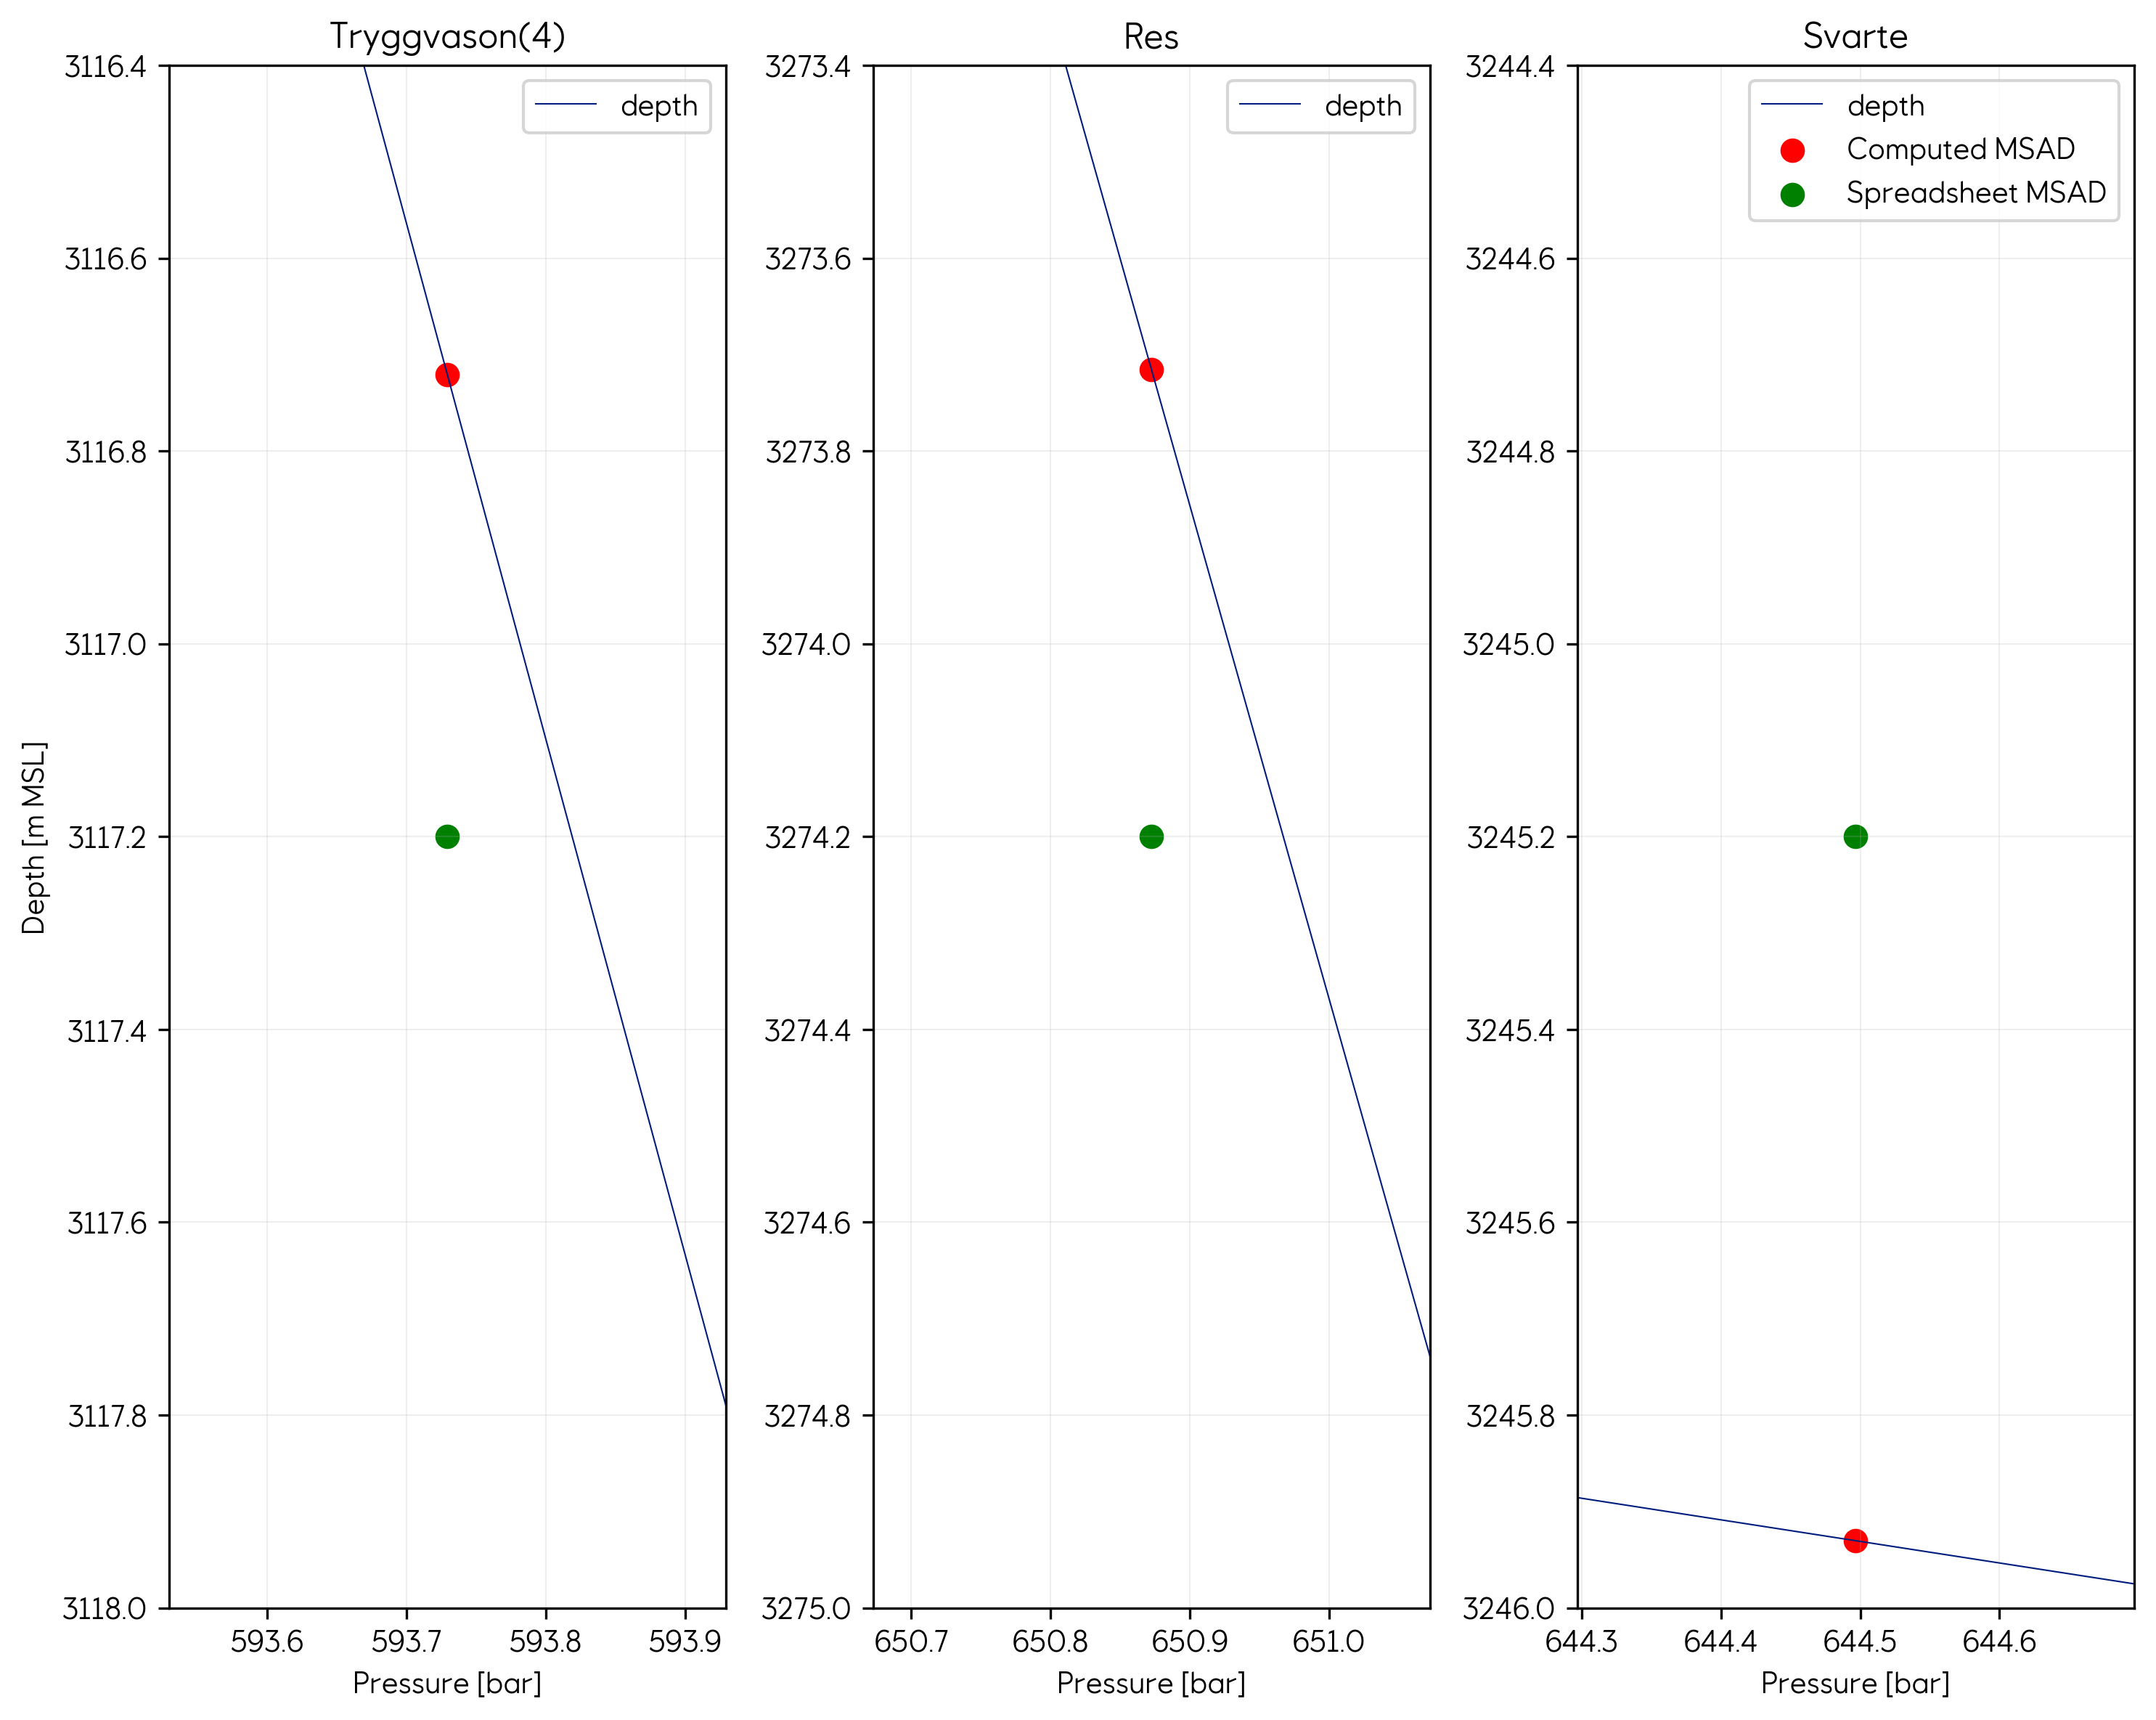

In [27]:
width_cm = 19.5
height_cm = 13.98

    

fig, axs = plt.subplots(ncols=3, figsize=(10,8))



for ax in axs:
	my_pressure.init_curves.plot('min_horizontal_stress', 'depth', ax=ax)


for ax_idx, index in enumerate(ranking_indices[-3:]):
	axs[ax_idx].scatter(
		my_pressure.scenario_manager.get_scenarios_summary()['p_MSAD'].iloc[index], 
		my_pressure.scenario_manager.get_scenarios_summary()['z_MSAD'].iloc[index],
		c='red', s=50, label = 'Computed MSAD')

	axs[ax_idx].scatter(
		my_pressure.scenario_manager.get_scenarios_summary()['p_MSAD'].iloc[index], 
		geological_tops_df.iloc[index,4],
		c='green', s=50, label = 'Spreadsheet MSAD')
	

	axs[ax_idx].set_xlim(
		my_pressure.scenario_manager.get_scenarios_summary()['p_MSAD'].iloc[index] - .2, 
		my_pressure.scenario_manager.get_scenarios_summary()['p_MSAD'].iloc[index] + .2)
	axs[ax_idx].set_ylim(geological_tops_df.iloc[index,4] - .8, geological_tops_df.iloc[index,4] + .8)
	
	axs[ax_idx].set_title(geological_tops_df.iloc[index].name)
	axs[ax_idx].invert_yaxis()
	axs[ax_idx].set_xlabel('Pressure [bar]')


axs[0].set_ylabel('Depth [m MSL]')

axs[2].legend()

fig.tight_layout()

In [28]:
geological_tops_df.iloc[0].name

'Res'

In [29]:
geological_tops_df

,depth,pressure,gradient,msad,msad_msl,depth_msl,sg
top,,,,,,,
Res,3772.2,665.000000,0.03200,3331.2,3274.2,3715.2,0.326309
Heather,3714.2,667.877416,0.03200,3355.2,3298.2,3657.2,0.326309
Cromer Knoll,3700.2,659.915129,0.03139,3317.2,3260.2,3643.2,0.320089
Svarte,3692.2,655.952929,0.02943,3302.2,3245.2,3635.2,0.300102
Tryggvason(1),3616.2,616.908894,0.02943,3225.2,3168.2,3559.2,0.300102
Tryggvason(2),3607.2,612.542600,0.02943,3204.2,3147.2,3550.2,0.300102
Tryggvason(3),3599.2,608.359459,0.02943,3185.2,3128.2,3542.2,0.300102
Tryggvason(4),3594.2,606.103963,0.02943,3174.2,3117.2,3537.2,0.300102
Tryggvason(5),3582.2,599.863391,0.02943,3144.2,3087.2,3525.2,0.300102


In [30]:
geological_tops_df['msad_screen'] = my_pressure.scenario_manager.get_scenarios_summary()['z_MSAD'].values

In [31]:
geological_tops_df['msad_diff'] = geological_tops_df['msad_screen'] - geological_tops_df['msad_msl']

In [32]:
geological_tops_df[['msad_msl', 'msad_screen', 'msad_diff']]

,msad_msl,msad_screen,msad_diff
top,,,
Res,3274.2,3273.715870,-0.484130
Heather,3298.2,3298.652575,0.452575
Cromer Knoll,3260.2,3260.119934,-0.080066
Svarte,3245.2,3245.930283,0.730283
Tryggvason(1),3168.2,3167.810797,-0.389203
Tryggvason(2),3147.2,3147.160894,-0.039106
Tryggvason(3),3128.2,3128.112935,-0.087065
Tryggvason(4),3117.2,3116.721095,-0.478905
Tryggvason(5),3087.2,3087.201747,0.001747


In [33]:
my_pressure.scenario_manager.get_scenarios_summary()['z_MSAD']

0     3273.715870
1     3298.652575
2     3260.119934
3     3245.930283
4     3167.810797
5     3147.160894
6     3128.112935
7     3116.721095
8     3087.201747
9     3041.244083
10    2907.018834
11    2893.262940
12    2861.038563
13    2824.500009
14    2777.630184
15    2597.659541
16    2592.640306
17    2572.034505
18    2622.752209
19    2610.301081
20    2588.805910
21    2574.800046
22    2536.777209
23    2518.926506
24    2509.207550
Name: z_MSAD, dtype: float64

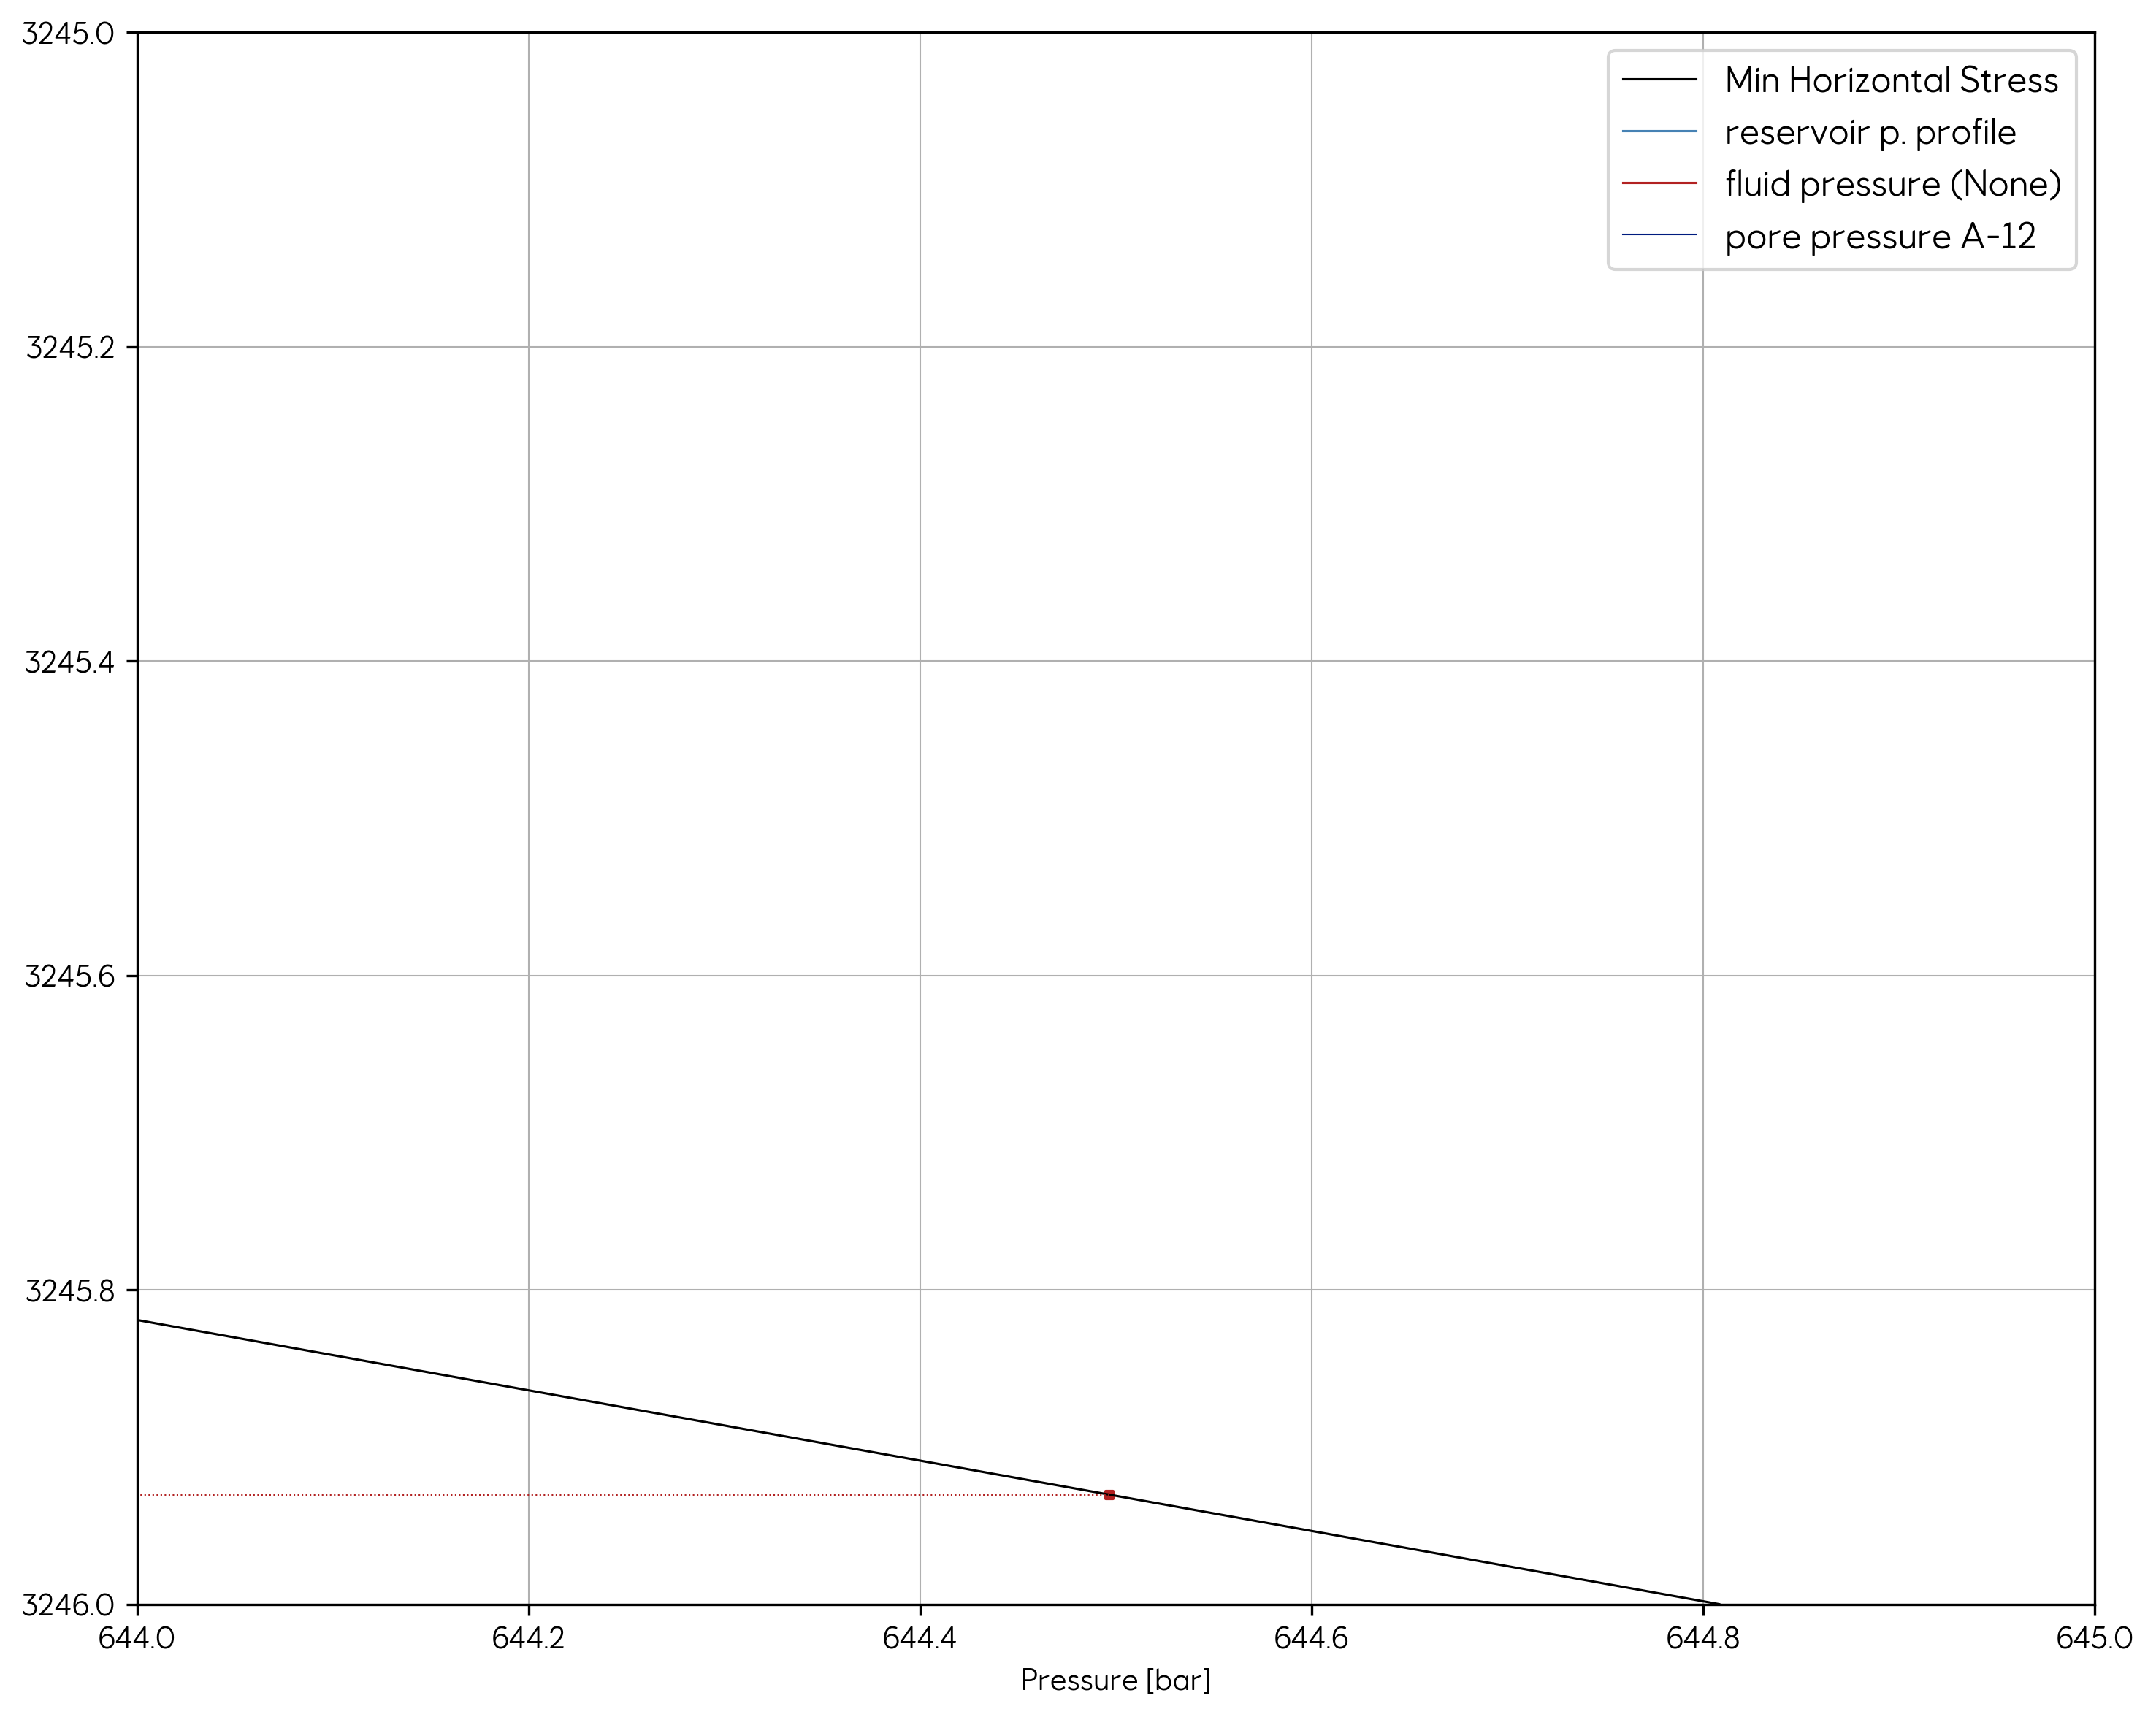

In [34]:
width_cm = 19.5
height_cm = 13.98

    

fig, ax = plt.subplots(ncols=1, figsize=(10,8))


rcParams['font.size'] = 12

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=False, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_resrv=False, #plot reservoir
              plot_delta_p=False, #plot delta p
              plot_fluid_pressure=True
              )

ax.plot(a12_data.iloc[:,11], a12_data.iloc[:,3]-57, label='pore pressure A-12', lw = 0.5)

ax.legend()
handles, labels = ax.get_legend_handles_labels()  
lgd = dict(zip(labels, handles))
ax.legend(lgd.values(), lgd.keys())
ax.set_ylim(3700, 2250  )
ax.set_xlim(200, 800)


ax.set_ylim(3246, 3245 )
ax.set_xlim(644, 645)

# ax.scatter(geological_tops_df['Pressure'], geological_tops_df['Depth']-57, color='red')

fig.tight_layout()

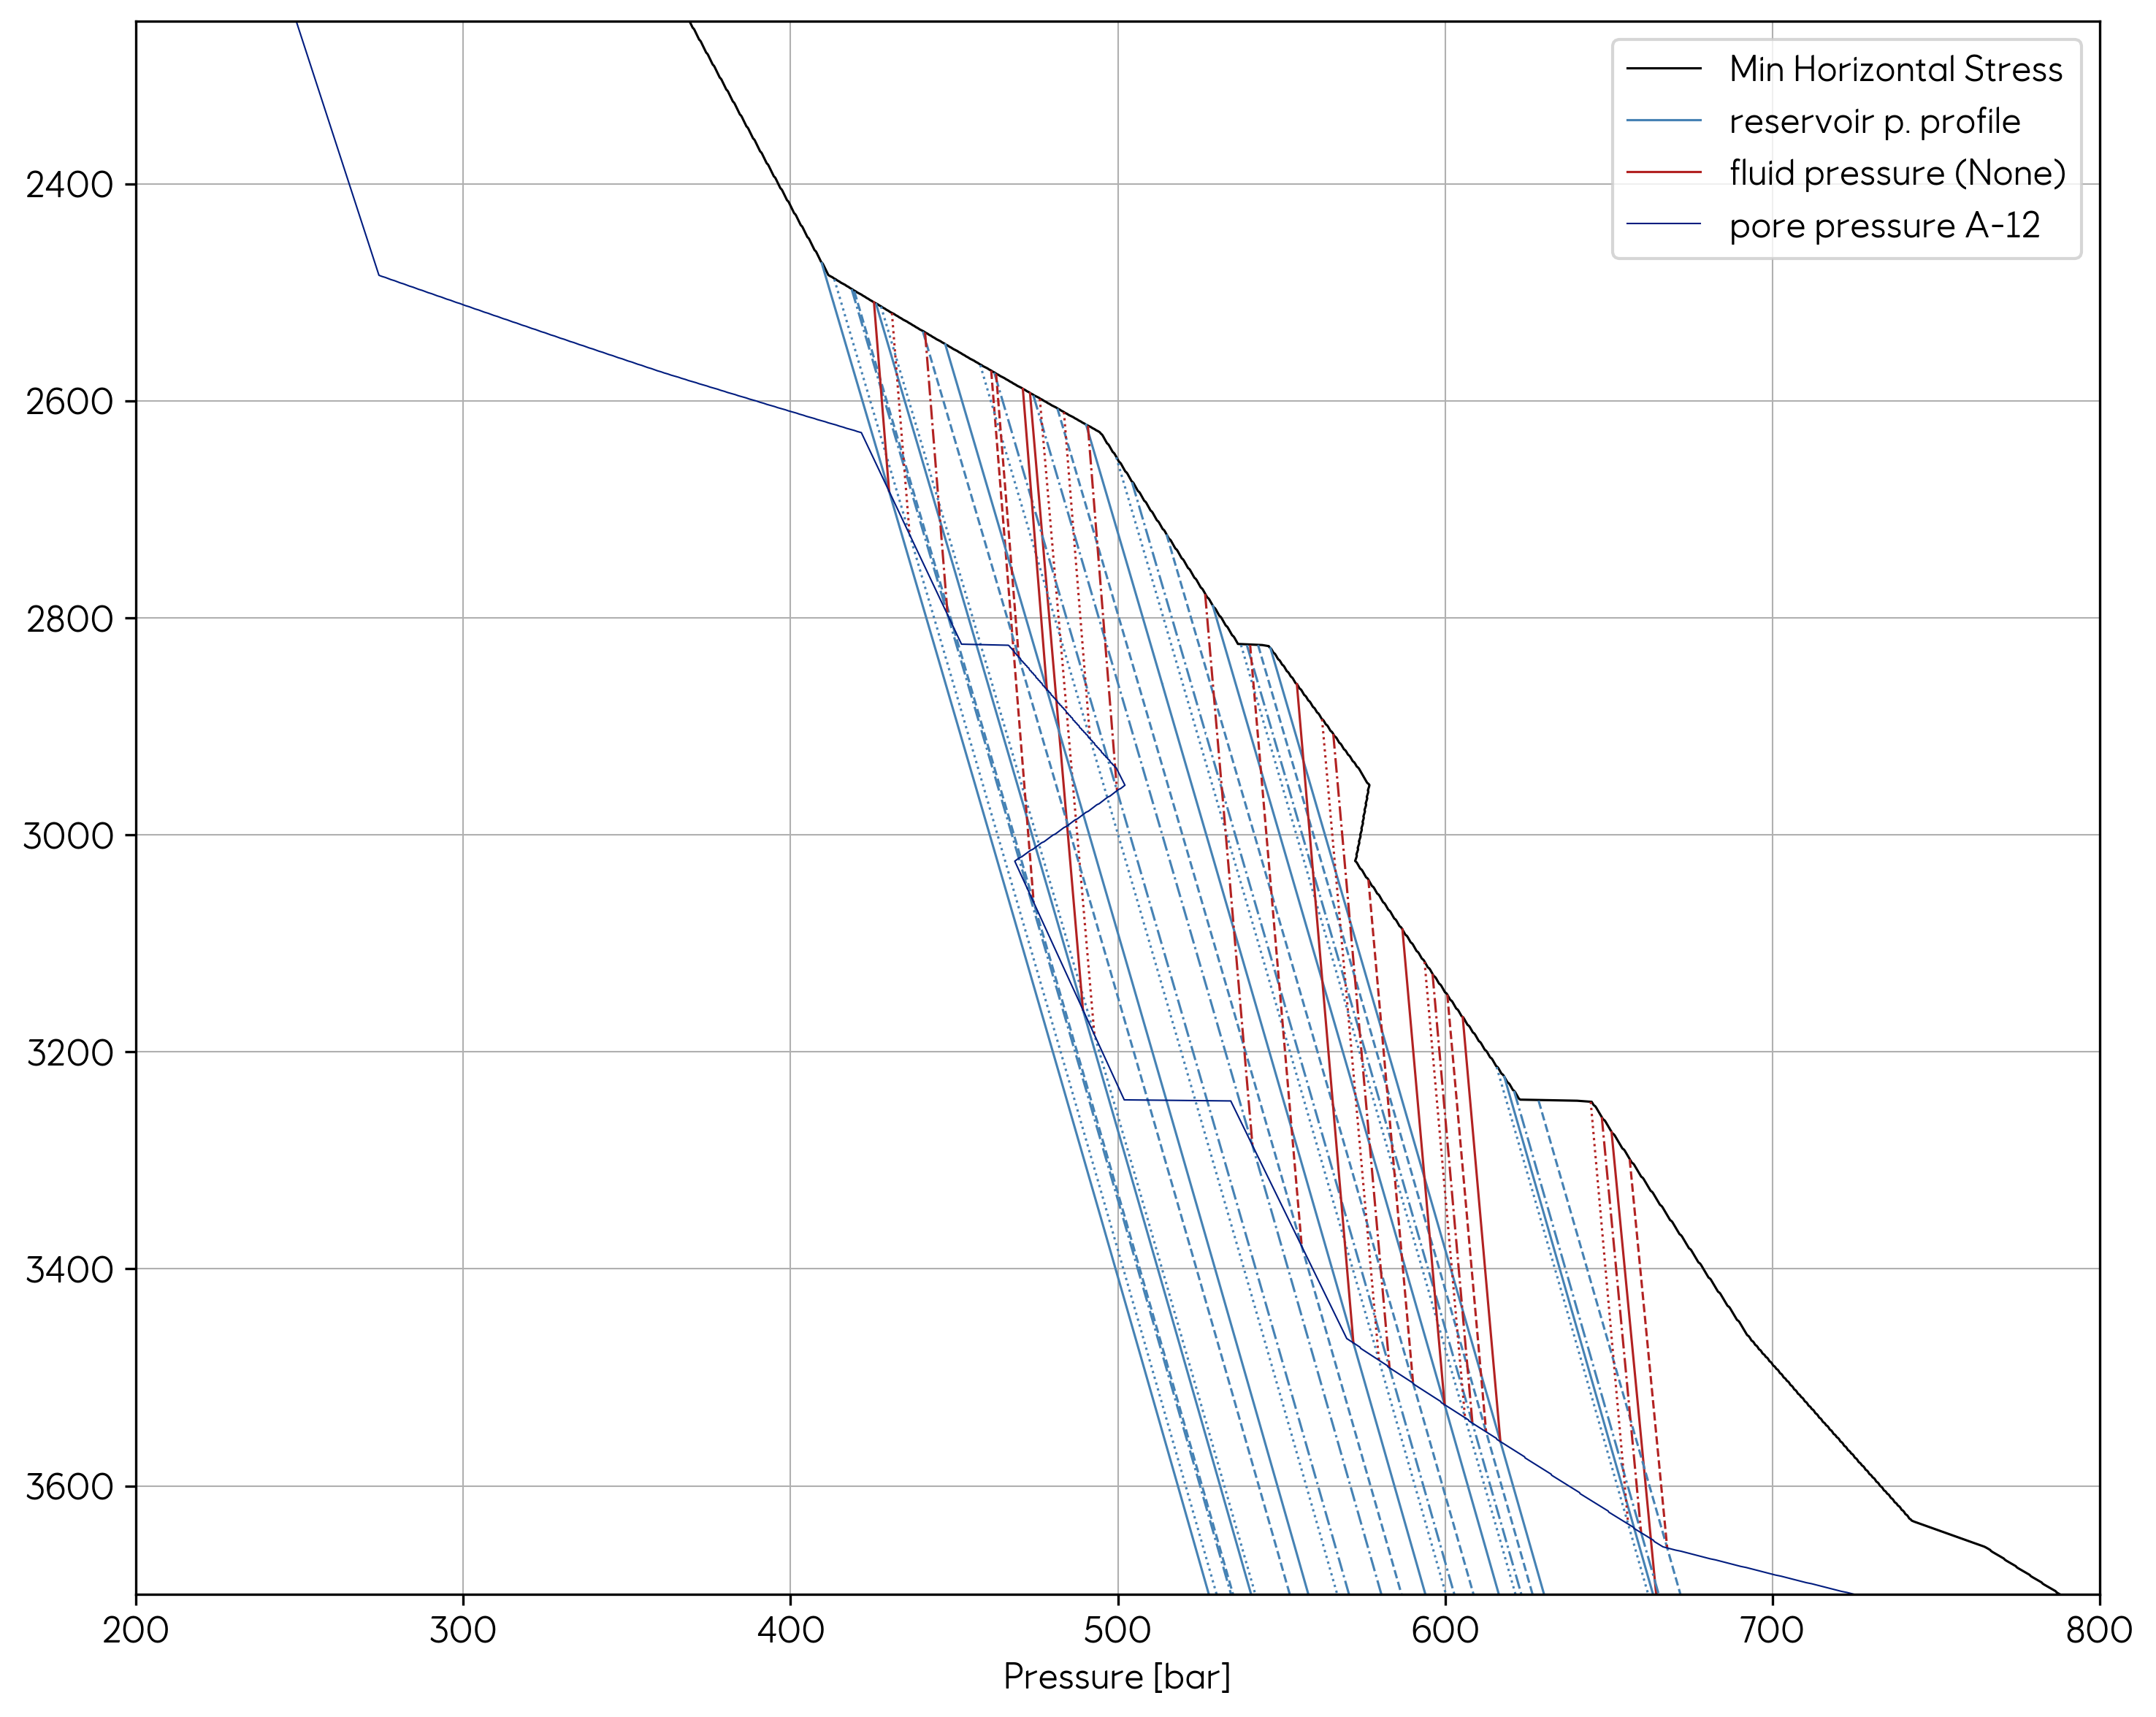

In [36]:
width_cm = 19.5
height_cm = 13.98

    

fig, ax = plt.subplots(ncols=1, figsize=(10,8))


rcParams['font.size'] = 12

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=False, #plot brine hydrostatic gradient
              plot_MSAD= False, #plot minimum safety abandonment depth,
              plot_resrv=False, #plot reservoir
              plot_delta_p=False, #plot delta p
              plot_fluid_pressure=True,
              
              )

ax.plot(a12_data.iloc[:,11], a12_data.iloc[:,3]-57, label='pore pressure A-12', lw = 0.5)

ax.legend()
handles, labels = ax.get_legend_handles_labels()  
lgd = dict(zip(labels, handles))
ax.legend(lgd.values(), lgd.keys())
ax.set_ylim(3700, 2250  )
ax.set_xlim(200, 800)

# ax.scatter(geological_tops_df['Pressure'], geological_tops_df['Depth']-57, color='red')

fig.tight_layout()